In [1]:
import semicon
import sympy
sympy.init_printing()

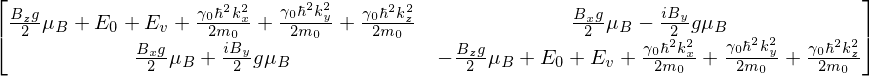

In [2]:
semicon.models.foreman(components=['foreman', 'zeeman'], bands=['gamma_6c'])

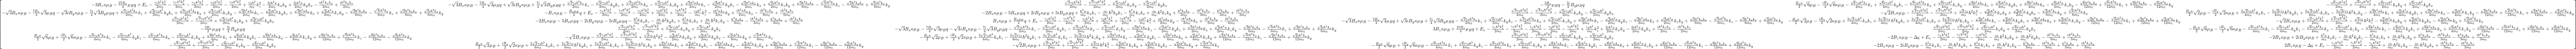

In [3]:
semicon.models.foreman(components=['foreman', 'zeeman'], bands=['gamma_8v', 'gamma_7v'])

# continuum dispersion

In [4]:
import kwant
import numpy as np
import scipy.linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

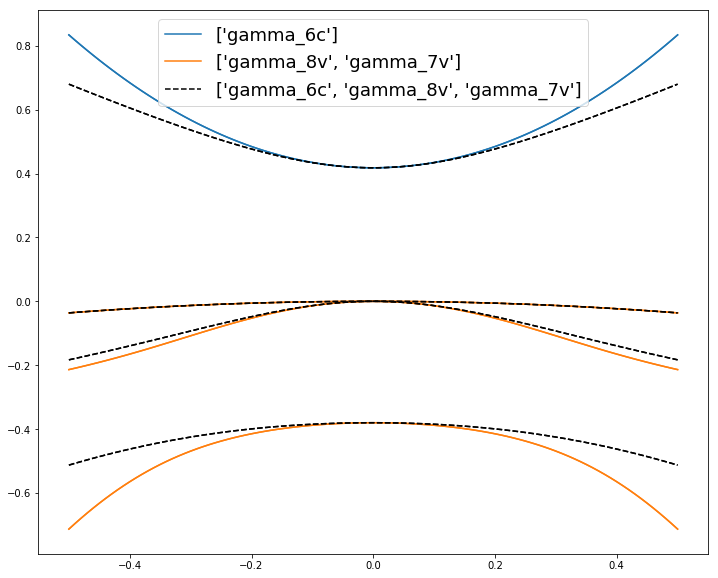

In [5]:
g0=1

plt.figure(figsize=(12, 10))

k = np.linspace(-.5, .5, 101)

bands = ['gamma_6c']
style = 'C0'
mat = semicon.models.foreman(components=['foreman'], bands=bands)
params = semicon.parameters.bulk(
    'winkler', 'InAs', bands=bands, extra_constants=semicon.parameters.constants
)
disp = kwant.continuum.lambdify(str(mat), locals=params)
e = np.array([la.eigvalsh(disp(k_x=ki, k_y=0, k_z=0)) for ki in k])

plt.plot(k, e, style)
plt.plot([], [], style, label=bands)



bands = ['gamma_8v', 'gamma_7v']
style = 'C1'
mat = semicon.models.foreman(components=['foreman'], bands=bands)
params = semicon.parameters.bulk(
    'winkler', 'InAs', bands=bands, extra_constants=semicon.parameters.constants
)
disp = kwant.continuum.lambdify(str(mat), locals=params)
e = np.array([la.eigvalsh(disp(k_x=ki, k_y=0, k_z=0)) for ki in k])

plt.plot(k, e, style)
plt.plot([], [], style, label=bands)



bands = ['gamma_6c', 'gamma_8v', 'gamma_7v']
style = 'k--'
mat = semicon.models.foreman(components=['foreman'], bands=bands)
params = semicon.parameters.bulk(
    'winkler', 'InAs', new_gamma_0=g0, bands=bands, extra_constants=semicon.parameters.constants
)
disp = kwant.continuum.lambdify(str(mat), locals=params)
e = np.array([la.eigvalsh(disp(k_x=ki, k_y=0, k_z=0)) for ki in k])

plt.plot(k, e, style)
plt.plot([], [], style, label=bands)

plt.legend(prop={'size': 18})